In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('spam.csv',encoding=('ISO-8859-1'))

In [3]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
data.rename(columns={'v1': "Mssg_Type",'v2':'Text'},inplace=True)
data

,Mssg_Type,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

data['Mssg_Type'] = encoder.fit_transform(data['Mssg_Type'])
data

,Mssg_Type,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [8]:
data.isnull().sum()

Mssg_Type    0
Text         0
dtype: int64

In [9]:
data.duplicated().sum()

403

In [10]:
data = data.drop_duplicates(keep='first')
data.duplicated().sum()

0

In [11]:
data.shape

(5169, 2)

In [12]:
data['Mssg_Type'].value_counts()

0    4516
1     653
Name: Mssg_Type, dtype: int64

In [13]:
import nltk

In [14]:
data.insert(loc=2, column ='num_char',value=data['Text'].apply(len))
data.insert(loc=3, column ='num_word',value=data['Text'].apply(lambda x:len(nltk.word_tokenize(x))))
data.insert(loc=4, column ='num_sent',value=data['Text'].apply(lambda x:len(nltk.sent_tokenize(x))))
data


,Mssg_Type,Text,num_char,num_word,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [15]:
data[['num_char','num_word','num_sent']].describe()

,num_char,num_word,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


<AxesSubplot:>

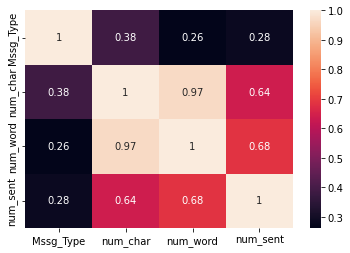

In [16]:
import seaborn as sns
sns.heatmap(data.corr(),annot=True)

# Data Preprocessing

In [17]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
import string


In [18]:
def data_transform(data):
    data = data.lower()
    data = nltk.word_tokenize(data)
    
    x=[]
    for i in data:
        if i.isalnum():
            x.append(i)
            
    data = x[:]
    x.clear()
    
    for i in data:
        if i not in stopwords.words('english') and i not in string.punctuation:
            x.append(i)
        
        
    data = x[:]
    x.clear()
    
    for i in data:
        x.append(ps.stem(i))
        
    return " ".join(x)
    

In [19]:
data.insert(loc=5, column ='trans_data',value=data['Text'].apply(data_transform))



In [20]:
data.head()

,Mssg_Type,Text,num_char,num_word,num_sent,trans_data
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# Most occuring words in spam message

In [21]:
spam_word = []
for msg in data[data['Mssg_Type']==1]['trans_data'].tolist():
    for word in msg.split():
        spam_word.append(word)

In [22]:
len(spam_word)

9939

In [23]:
from collections import Counter
pd.DataFrame(Counter(spam_word).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


# TF-IDF Vectorizer

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [25]:
X = tfidf.fit_transform(data['trans_data']).toarray()
X.shape

(5169, 3000)

In [26]:
Y = data['Mssg_Type'].values
Y

array([0, 0, 1, ..., 0, 0, 0])

# Naive Bayes

In [27]:
from sklearn.model_selection import train_test_split
X_train,x_test,Y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [28]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [29]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [30]:
gnb.fit(X_train,Y_train)
y_predict1 = gnb.predict(x_test)
print('Accuracy Score of GNB ',accuracy_score(y_test,y_predict1))
print(confusion_matrix(y_test,y_predict1))
print('Precision Score of GNB',precision_score(y_test,y_predict1))

Accuracy Score of GNB  0.8694390715667312
[[788 108]
 [ 27 111]]
Precision Score of GNB 0.5068493150684932


In [31]:
mnb.fit(X_train,Y_train)
y_predict2 = mnb.predict(x_test)
print('Accuracy Score of MNB ',accuracy_score(y_test,y_predict2))
print(confusion_matrix(y_test,y_predict2))
print('Precision Score of MNB',precision_score(y_test,y_predict2))

Accuracy Score of MNB  0.9709864603481625
[[896   0]
 [ 30 108]]
Precision Score of MNB 1.0


In [32]:
bnb.fit(X_train,Y_train)
y_predict3 = bnb.predict(x_test)
print('Accuracy Score of BNB ',accuracy_score(y_test,y_predict3))
print(confusion_matrix(y_test,y_predict3))
print('Precision Score of BNB',precision_score(y_test,y_predict3))

Accuracy Score of BNB  0.9835589941972921
[[895   1]
 [ 16 122]]
Precision Score of BNB 0.991869918699187


# Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

In [34]:
y_predict4 = lr.predict(x_test)

In [35]:
from sklearn.metrics import accuracy_score, precision_score
print('Accuracy_score :',accuracy_score(y_test,y_predict4))
print('Precision_score:',precision_score(y_test,y_predict4))

Accuracy_score : 0.9564796905222437
Precision_score: 0.979381443298969


# Support Vector

In [36]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,Y_train)

SVC()

In [37]:
y_predict5 = svc.predict(x_test)

In [38]:
print('Accuracy_score',accuracy_score(y_test,y_predict5))
print('Pricision_score',precision_score(y_test,y_predict5))

Accuracy_score 0.9729206963249516
Pricision_score 0.9824561403508771


# Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [40]:
y_predict6 = rf.predict(x_test)

In [41]:
print('Accuracy_score',accuracy_score(y_test,y_predict6))
print('Pricision_score',precision_score(y_test,y_predict6))

Accuracy_score 0.9709864603481625
Pricision_score 0.9655172413793104


In [42]:
final_data = pd.DataFrame({'Models':['gnb','mnb','bnb','lr','svc','rf'],'Accuracy':[accuracy_score(y_test,y_predict1),
                                                                                    accuracy_score(y_test,y_predict2),
                                                                                    accuracy_score(y_test,y_predict3),
                                                                                    accuracy_score(y_test,y_predict4),
                                                                                    accuracy_score(y_test,y_predict5),
                                                                                    accuracy_score(y_test,y_predict6)],
                           
                                                                       'Precision':[precision_score(y_test,y_predict1),
                                                                                    precision_score(y_test,y_predict2),
                                                                                    precision_score(y_test,y_predict3),
                                                                                    precision_score(y_test,y_predict4),
                                                                                    precision_score(y_test,y_predict5),
                                                                                    precision_score(y_test,y_predict6)]})

In [43]:
final_data

,Models,Accuracy,Precision
0,gnb,0.869439,0.506849
1,mnb,0.970986,1.000000
2,bnb,0.983559,0.991870
3,lr,0.956480,0.979381
4,svc,0.972921,0.982456
5,rf,0.970986,0.965517


# Save the Best Model

In [44]:
import joblib
joblib.dump(mnb,'Spam SMS Prediction')

['Spam SMS Prediction']

In [45]:
model = joblib.load('Spam SMS Prediction')

In [46]:
input_sms = input('Enter the sms : ')
transformed_sms = data_transform(input_sms)
vector_input = tfidf.transform([transformed_sms])
result = model.predict(vector_input)
print()
if result ==1:
    print("Spam")
else:
    print("Not Spam")

Enter the sms : Dear User, Welcome Bonus Up to Rs 20,000 for Today! Play & Win Instant Cash Prizes on First Games by Paytm! T&C. Download the app now. http://bit.ly/3kAqrzb

Spam
